# **Mushroom Apriori-**

Group Members:
1.Mohammad Nurul Abrar (2018-1-60-139)
2.MD Maruf (2018-1-60-140)

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
pip install apyori

  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=8a063149900f3858a240e2651f30cbf049ec30c576d28ac1256f856b75366772
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from apyori import apriori
import time

In [ ]:

mushroomdata= pd.read_csv("/content/gdrive/MyDrive/477project/mushroom.csv", header = None) 
mushroomdata

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22
0,1,3,9,13,23,25,34,36,38,40,52,54,59,63,67,76,85,86,90,93,98,107,113
1,2,3,9,14,23,26,34,36,39,40,52,55,59,63,67,76,85,86,90,93,99,108,114
2,2,4,9,15,23,27,34,36,39,41,52,55,59,63,67,76,85,86,90,93,99,108,115
3,1,3,10,15,23,25,34,36,38,41,52,54,59,63,67,76,85,86,90,93,98,107,113
4,2,3,9,16,24,28,34,37,39,40,53,54,59,63,67,76,85,86,90,94,99,109,114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,7,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,88,90,93,106,112,119
8120,2,3,9,13,24,28,35,36,39,50,52,58,59,63,73,83,85,87,90,93,106,110,119
8121,2,6,9,13,24,28,35,36,39,41,52,58,59,63,73,83,85,88,90,93,106,112,119
8122,1,7,10,13,24,31,34,36,38,48,53,58,59,66,67,76,85,86,90,94,102,110,119


In [ ]:
#manually add the column name which should be convert from category to numeric
Cat = []

for column in Cat:
    col_name = column + '_cat'
    df[col_name] = df[column].astype('category').cat.codes
    df=df.drop([column], axis=1)

In [ ]:
mushroomdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       8124 non-null   int64
 1   1       8124 non-null   int64
 2   2       8124 non-null   int64
 3   3       8124 non-null   int64
 4   4       8124 non-null   int64
 5   5       8124 non-null   int64
 6   6       8124 non-null   int64
 7   7       8124 non-null   int64
 8   8       8124 non-null   int64
 9   9       8124 non-null   int64
 10  10      8124 non-null   int64
 11  11      8124 non-null   int64
 12  12      8124 non-null   int64
 13  13      8124 non-null   int64
 14  14      8124 non-null   int64
 15  15      8124 non-null   int64
 16  16      8124 non-null   int64
 17  17      8124 non-null   int64
 18  18      8124 non-null   int64
 19  19      8124 non-null   int64
 20  20      8124 non-null   int64
 21  21      8124 non-null   int64
 22  22      8124 non-null   int64
dtypes: int64(23)


In [ ]:
mushroomdata.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
dtype: int64

In [ ]:
rowlength = len(mushroomdata)
no_features = len(mushroomdata.values[0])

In [ ]:
#Dataframe to list of list
mushroomrecords = []
for i in range(0, rowlength):
    mushroomrecords.append([int(mushroomdata.values[i,j]) for j in range(0, no_features)if int(mushroomdata.values[i,j]) != 0])
    #removing 0

In [ ]:
mthreshold = 1
mushroom_time = []
mthreshold_value = []

for i in range(0,7):
  start = time.time()
  rules = apriori(mushroomrecords,min_support=mthreshold)     #apriori model(association rules)
  output = list(rules)                                        #apriori model(association rules)
  end = time.time()
  mushroom_time.append(end-start)
  mthreshold_value.append(mthreshold)
  mthreshold = mthreshold - 0.1
  print(output)

[RelationRecord(items=frozenset({85}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({85}), confidence=1.0, lift=1.0)])]
[RelationRecord(items=frozenset({34}), support=0.9741506646971935, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({34}), confidence=0.9741506646971935, lift=1.0)]), RelationRecord(items=frozenset({85}), support=1.0, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({85}), confidence=1.0, lift=1.0)]), RelationRecord(items=frozenset({86}), support=0.9753815854258986, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({86}), confidence=0.9753815854258986, lift=1.0)]), RelationRecord(items=frozenset({90}), support=0.9217134416543574, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({90}), confidence=0.9217134416543574, lift=1.0)]), RelationRecord(items=frozenset({34, 85}), support=0.9741506646971935

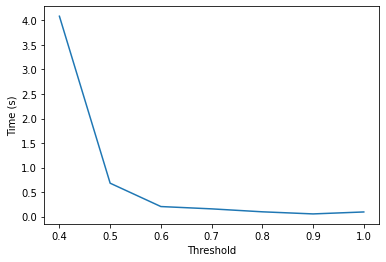

In [ ]:
from matplotlib import pyplot as plt

plt.plot(mthreshold_value,mushroom_time, label='mushroom dataset')
plt.xlabel("Threshold")
plt.ylabel("Time (s)")
plt.savefig("mushroom_apriori.jpg")

Mushroom Dataset Analysis

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     / 34.6 MB 51.4 MB/s
     |████████████████████████████████| 10.1 MB 12.1 MB/s 
     |████████████████████████████████| 636 kB 45.7 MB/s 
     |████████████████████████████████| 102 kB 51.6 MB/s 
     |████████████████████████████████| 675 kB 36.0 MB/s 
     |████████████████████████████████| 3.1 MB 39.5 MB/s 
     |████████████████████████████████| 62 kB 817 kB/s 
     |████████████████████████████████| 812 kB 41.1 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=d71aeb35798bd16ed63e6158fc91c044e5a499137b7fb4b8db1c03f75690d6e1
  Stored in directory: /tmp/pip-ephem-wheel-cache-76vmlah3/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=3d7058648f314c77bf2caac1a43a705f18b3464e6415ceaa52af853b97a66a33
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b1

In [ ]:
data=pd.read_csv("/content/gdrive/MyDrive/477project/mushroom.csv")

In [ ]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [ ]:
!pip install pandas-profiling

In [ ]:
import numpy as np
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
pro=pandas_profiling.ProfileReport(data)

pro


Output hidden; open in https://colab.research.google.com to view.

In [ ]:
pro.to_file("mushroom.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]